In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from pathlib import Path
from pandas import concat, DataFrame
import pickle

In [2]:
parts = list()
for file in Path('.').glob('results_chunk*p'):
    with open(file, 'rb') as fin:
        parts.append(pickle.load(fin))
        
raw_data = concat(parts).reset_index(drop=True)

raw_data['real'] = raw_data['real'].str[:-2].astype(int)
raw_data['user'] = raw_data['user'].str[:-2].astype(int)
raw_data['sys'] = raw_data['sys'].str[:-2].astype(int)

In [3]:
data = raw_data.groupby(['num_vects', 'vect_size', 'algorithm', 'data_type']).agg('mean').drop(columns=['iteration']).reset_index()
data

,num_vects,vect_size,algorithm,data_type,real,user,sys
0,1000,10,INSERTION,RANDOM,23.7,20.0,0.0
1,1000,10,INSERTION,REVERSE,49.2,40.0,0.0
2,1000,10,INSERTION,SORTED,0.0,0.0,0.0
3,1000,10,INSERTION_IMPROVED,RANDOM,1.3,0.0,0.0
4,1000,10,INSERTION_IMPROVED,REVERSE,3.5,0.0,0.0
...,...,...,...,...,...,...,...
211,250000,50,INSERTION_IMPROVED,REVERSE,464235.7,287695.0,1786.0
212,250000,50,INSERTION_IMPROVED,SORTED,436.8,58.0,0.0
213,250000,50,MERGE,RANDOM,31131.1,3239.0,1200.0
214,250000,50,MERGE,REVERSE,30238.7,3191.0,1129.0


In [4]:
vector_type_map = {
    'RANDOM': "Random Vector",
    'SORTED': "Sorted Vector",
    'REVERSE': "Inverse Sorted Vector"
}

In [5]:
insertion_data = data[data.algorithm.eq('INSERTION')]
improved_insertion_data = data[data.algorithm.eq('INSERTION_IMPROVED')]
merge_data = data[data.algorithm.eq('MERGE')]

In [6]:
i_piv = insertion_data.pivot_table(index='num_vects', columns=['vect_size', 'data_type'], values='user').fillna('-')
i_piv

vect_size         10                           25                     \
data_type     RANDOM    REVERSE SORTED     RANDOM     REVERSE SORTED   
num_vects                                                              
1000            20.0       40.0    0.0       48.0        99.0    0.0   
2500           133.0      274.0    0.0      361.0       678.0    0.0   
5000           661.0     1252.0    0.0     1674.0      3089.0    0.0   
10000         3066.0     5590.0    0.0     7357.0     14823.0    0.0   
25000        24187.0    42165.0    2.0    55826.0     95559.0   10.0   
50000       112474.0   177178.0    0.0   253150.0    406606.0   20.0   
100000      517687.0   683763.0   20.0  1020830.0   1548484.0   30.0   
250000     3393640.0  4343627.0   27.0  6583880.0  11162846.0   64.0   

vect_size          50                     
data_type      RANDOM     REVERSE SORTED  
num_vects                                 
1000             98.0       200.0    0.0  
2500            757.0      1426.0    0.0  
5000           3515.0      6383.0    0.0  
10000         16256.0     31365.0   10.0  
25000        113385.0    199266.0   13.0  
50000        489211.0    836286.0   21.0  
100000      1853612.0   3120282.0   50.0  
250000     13045987.0  21366234.0  118.0

In [7]:
ii_piv = improved_insertion_data.pivot_table(index='num_vects', columns=['vect_size', 'data_type'], values='user').fillna('-')
ii_piv

vect_size        10                         25                         50  \
data_type    RANDOM   REVERSE SORTED    RANDOM   REVERSE SORTED    RANDOM   
num_vects                                                                   
1000            0.0       0.0    0.0       0.0       0.0    0.0       0.0   
2500           10.0      11.0    0.0      10.0      18.0    0.0      10.0   
5000           35.0      71.0    0.0      35.0      72.0    0.0      40.0   
10000         151.0     334.0    0.0     158.0     337.0    0.0     189.0   
25000        1202.0    2540.0    0.0    1327.0    2683.0   10.0    1374.0   
50000        5253.0   10872.0    0.0    5629.0   10906.0   10.0    4153.0   
100000      21552.0   44927.0   10.0   20790.0   42225.0   20.0   20148.0   
250000     129273.0  260834.0   10.0  129393.0  266645.0   31.0  141707.0   

vect_size                   
data_type   REVERSE SORTED  
num_vects                   
1000            0.0    0.0  
2500           19.0    0.0  
5000           73.0    0.0  
10000         400.0    0.0  
25000        2570.0    5.0  
50000        8601.0   17.0  
100000      41169.0   30.0  
250000     287695.0   58.0

In [8]:
m_piv = merge_data.pivot_table(index='num_vects', columns=['vect_size', 'data_type'], values='user').fillna('-')
m_piv

vect_size      10                      25                      50          \
data_type  RANDOM REVERSE  SORTED  RANDOM REVERSE  SORTED  RANDOM REVERSE   
num_vects                                                                   
1000          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2500          0.0     0.0     0.0     7.0     3.0     0.0    11.0    10.0   
5000          8.0     1.0     1.0    18.0    11.0    10.0    35.0    30.0   
10000        20.0    13.0    16.0    40.0    39.0    40.0    88.0    90.0   
25000        55.0    50.0    50.0   135.0   129.0   132.0   237.0   248.0   
50000       128.0   120.0   118.0   288.0   277.0   280.0   466.0   563.0   
100000      444.0   400.0   446.0   761.0   748.0   753.0  1023.0  1014.0   
250000     1161.0  1160.0  1137.0  1781.0  1764.0  1746.0  3239.0  3191.0   

vect_size          
data_type  SORTED  
num_vects          
1000          0.0  
2500         10.0  
5000         30.0  
10000        91.0  
25000       237.0  
50000       555.0  
100000     1018.0  
250000     3183.0

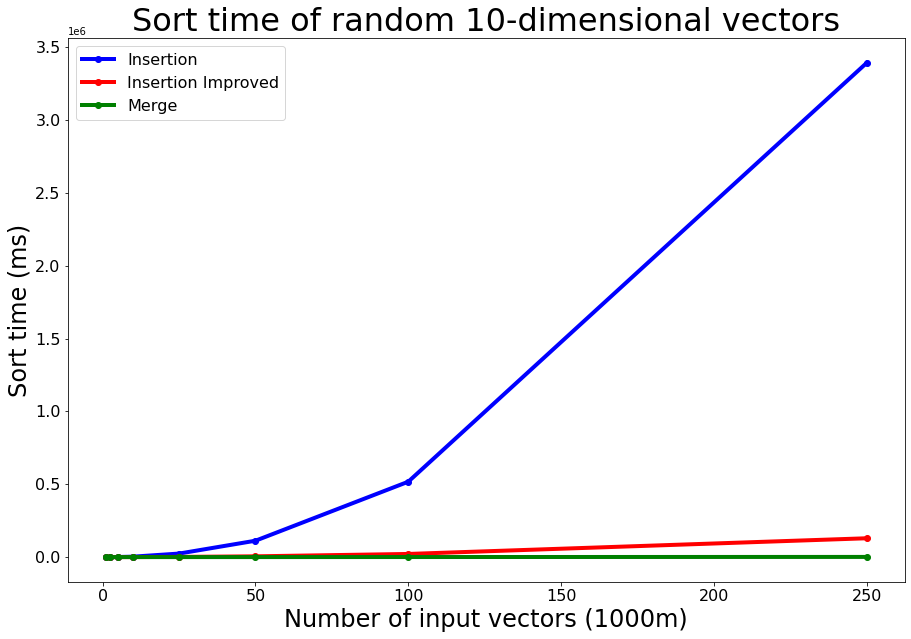

In [9]:
key = (10, 'RANDOM')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = list(i_piv.index / 1000)
y_i  = i_piv[key]
y_ii = ii_piv[key]
y_m  = m_piv[key]


plt.plot(x, y_i, '-ob', linewidth=4)
plt.plot(x, y_ii, '-or', linewidth=4)
plt.plot(x, y_m, '-og', linewidth=4)


ax.set_title('Sort time of random 10-dimensional vectors', fontsize=32)
ax.set_xlabel('Number of input vectors (1000m)', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Insertion', 'Insertion Improved', 'Merge'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

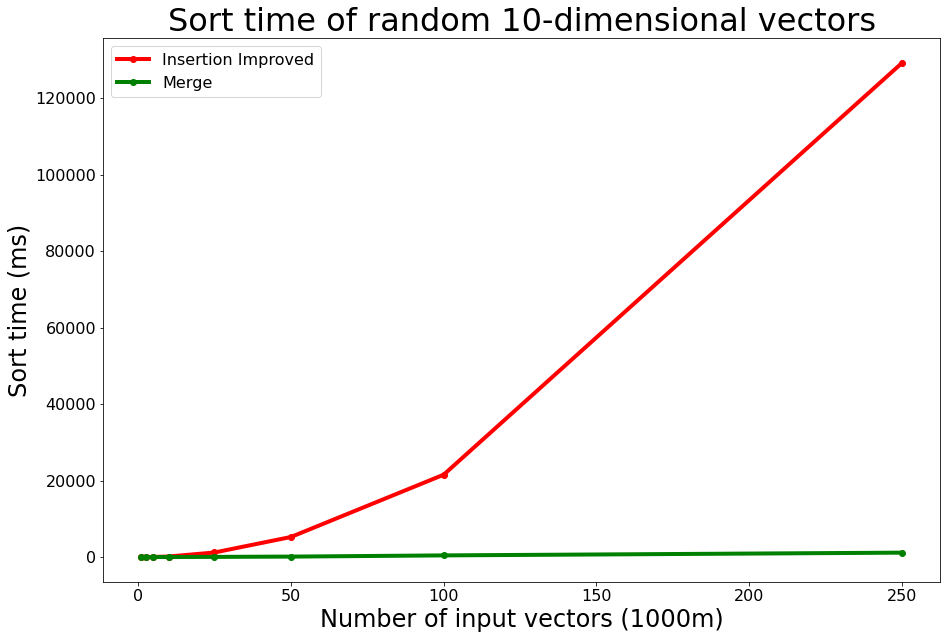

In [10]:
key = (10, 'RANDOM')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = list(i_piv.index / 1000)
y_i  = i_piv[key]
y_ii = ii_piv[key]
y_m  = m_piv[key]


plt.plot(x, y_ii, '-or', linewidth=4)
plt.plot(x, y_m, '-og', linewidth=4)


ax.set_title('Sort time of random 10-dimensional vectors', fontsize=32)
ax.set_xlabel('Number of input vectors (1000m)', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Insertion Improved', 'Merge'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

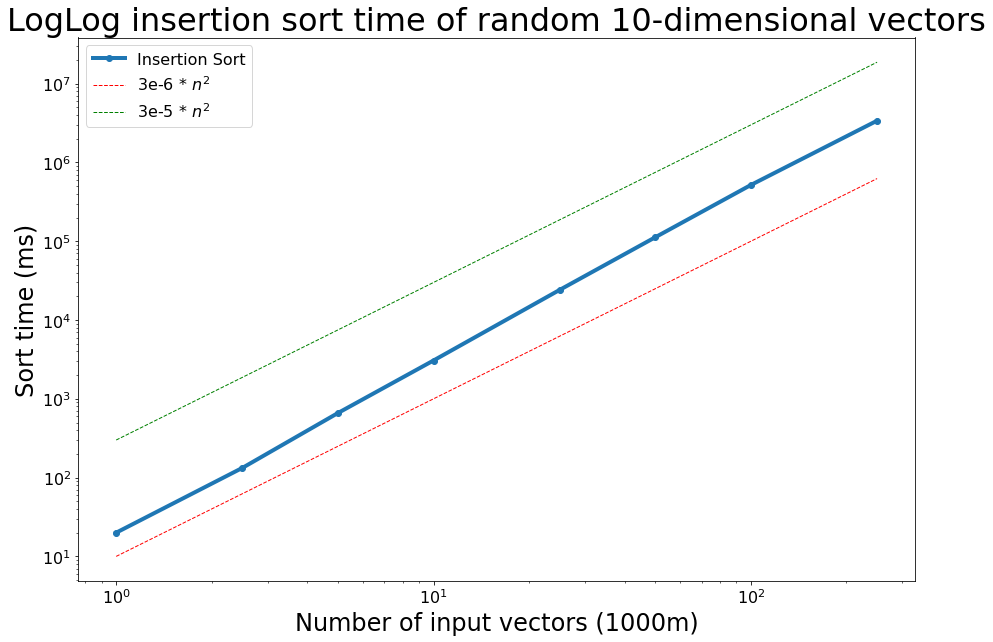

In [11]:
key = (10, 'RANDOM')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = list(i_piv.index / 1000)
y_i  = i_piv[key]

plt.plot(x, y_i, '-o', linewidth=4)

x2 = np.linspace(x[0], x[-1], num=100)

# c1 = 3e-6
# n1 = [c1*(n*1000)**2*np.log(n*1000) for n in x2]

# c2 = 3e-5
# n2 = [c2*(n*1000)**2*np.log(n*1000) for n in x2]

c1 = 1e-5
n1 = [c1*(n*1000)**2 for n in x2]

c2 = 3e-4
n2 = [c2*(n*1000)**2 for n in x2]

plt.plot(x2, n1, '--r', linewidth=1)
plt.plot(x2, n2, '--g', linewidth=1)


ax.set_title('LogLog insertion sort time of random 10-dimensional vectors', fontsize=32)
ax.set_xlabel('Number of input vectors (1000m)', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Insertion Sort', '3e-6 * $n^2$', '3e-5 * $n^2$'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

ax.set_xscale('log')
ax.set_yscale('log')

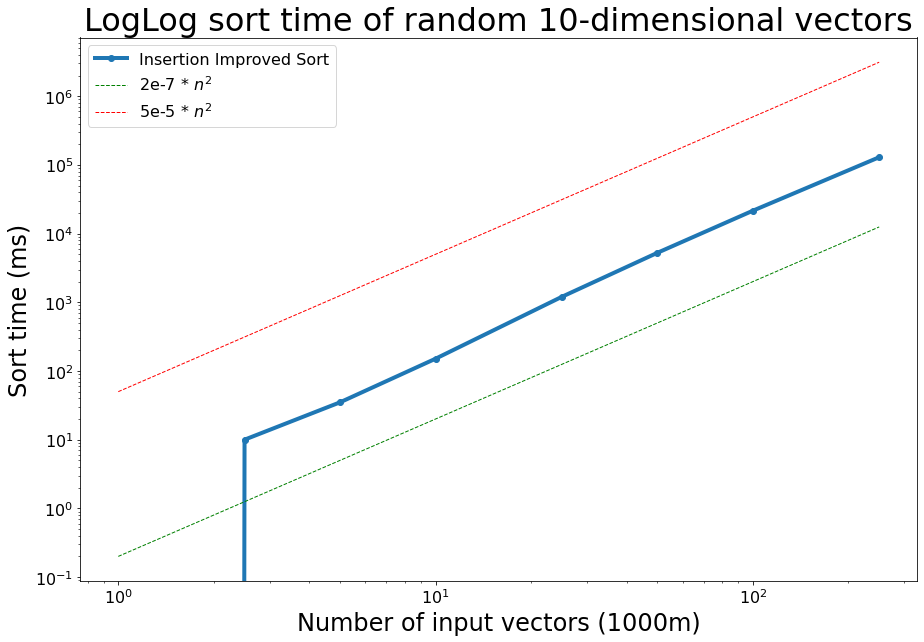

In [12]:
key = (10, 'RANDOM')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = list(ii_piv.index / 1000)
y_ii  = ii_piv[key]

plt.plot(x, y_ii, '-o', linewidth=4)

x2 = np.linspace(x[0], x[-1], num=100)

c1 = 2e-7
n1 = [c1*(n*1000)**2 for n in x2]

c2 = 5e-5
n2 = [c2*(n*1000)**2 for n in x2]

plt.plot(x2, n1, '--g', linewidth=1)
plt.plot(x2, n2, '--r', linewidth=1)


ax.set_title('LogLog sort time of random 10-dimensional vectors', fontsize=32)
ax.set_xlabel('Number of input vectors (1000m)', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Insertion Improved Sort', '2e-7 * $n^2$', '5e-5 * $n^2$'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

ax.set_xscale('log')
ax.set_yscale('log')

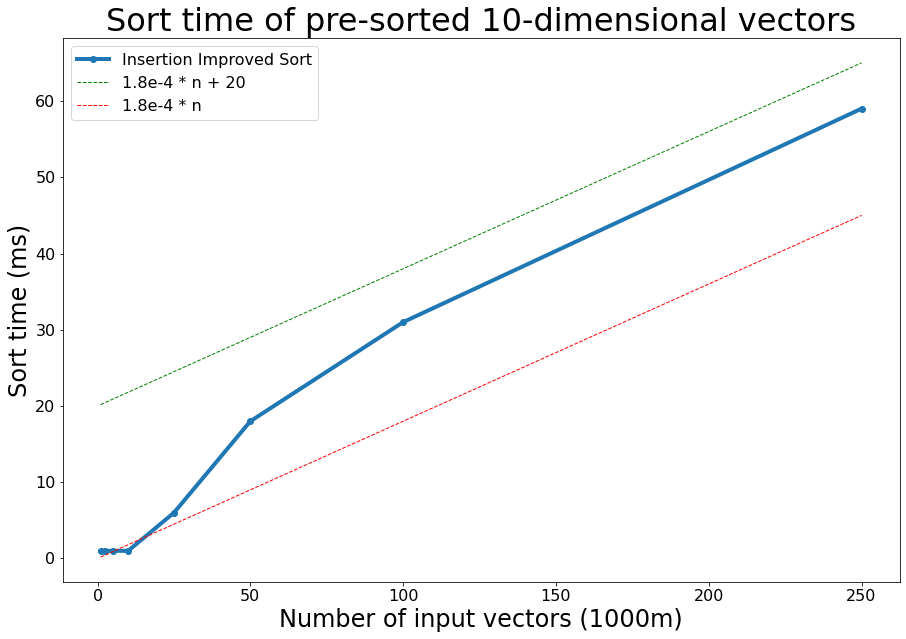

In [13]:
key = (50, 'SORTED')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = list(ii_piv.index / 1000)
y_ii  = ii_piv[key]+1

plt.plot(x, y_ii, '-o', linewidth=4)

x2 = np.linspace(x[0], x[-1], num=100)

c1 = 1.8e-4  # green
n1 = [c1*(n*1000)+20 for n in x2]

c2 = 1.8e-4
n2 = [c2*(n*1000) for n in x2]

plt.plot(x2, n1, '--g', linewidth=1)
plt.plot(x2, n2, '--r', linewidth=1)


ax.set_title('Sort time of pre-sorted 10-dimensional vectors', fontsize=32)
ax.set_xlabel('Number of input vectors (1000m)', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Insertion Improved Sort', '1.8e-4 * n + 20', '1.8e-4 * n'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# ax.set_xscale('log')
# ax.set_yscale('log')

In [14]:
i_piv

vect_size         10                           25                     \
data_type     RANDOM    REVERSE SORTED     RANDOM     REVERSE SORTED   
num_vects                                                              
1000            20.0       40.0    0.0       48.0        99.0    0.0   
2500           133.0      274.0    0.0      361.0       678.0    0.0   
5000           661.0     1252.0    0.0     1674.0      3089.0    0.0   
10000         3066.0     5590.0    0.0     7357.0     14823.0    0.0   
25000        24187.0    42165.0    2.0    55826.0     95559.0   10.0   
50000       112474.0   177178.0    0.0   253150.0    406606.0   20.0   
100000      517687.0   683763.0   20.0  1020830.0   1548484.0   30.0   
250000     3393640.0  4343627.0   27.0  6583880.0  11162846.0   64.0   

vect_size          50                     
data_type      RANDOM     REVERSE SORTED  
num_vects                                 
1000             98.0       200.0    0.0  
2500            757.0      1426.0    0.0  
5000           3515.0      6383.0    0.0  
10000         16256.0     31365.0   10.0  
25000        113385.0    199266.0   13.0  
50000        489211.0    836286.0   21.0  
100000      1853612.0   3120282.0   50.0  
250000     13045987.0  21366234.0  118.0

In [44]:
data_type = 'RANDOM'

i_scaled = i_piv[[(10, data_type), (25, data_type), (50, data_type)]]
i_baseline = i_scaled[(10, data_type)]
i_scaled = i_scaled.divide(i_baseline, axis=0)

ii_scaled = ii_piv[[(10, data_type), (25, data_type), (50, data_type)]]
ii_baseline = ii_scaled[(10, data_type)]
ii_scaled = ii_scaled.divide(ii_baseline, axis=0)

m_scaled = m_piv[[(10, data_type), (25, data_type), (50, data_type)]]
m_baseline = m_scaled[(10, data_type)]
m_scaled = m_scaled.divide(m_baseline, axis=0)

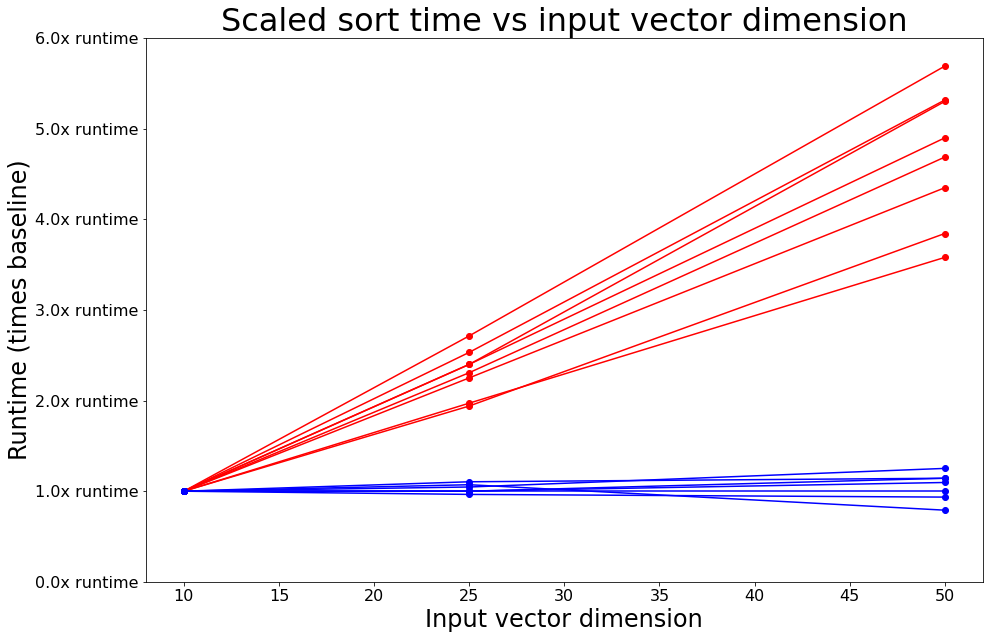

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = (10, 25, 50)
for row in i_scaled.itertuples(index=False):
    plt.plot(x, list(row), '-ro')
    
for row in ii_scaled.itertuples(index=False):
    plt.plot(x, list(row), '-bo')
    
# for row in m_scaled.itertuples(index=False):
#     plt.plot(x, list(row), '-go')
    
ax.set_title('Scaled sort time vs input vector dimension', fontsize=32)
ax.set_xlabel('Input vector dimension', fontsize=24)
ax.set_ylabel('Runtime (times baseline)', fontsize=24)
# ax.legend(['Insertion Improved Sort', '1.8e-4 * n + 20', '1.8e-4 * n'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(ticks=ax.get_yticks(), labels=[f'{tick}x runtime' for tick in ax.get_yticks()], fontsize=16);
   

In [47]:
[f'{tick}x runtime' for tick in ax.get_yticks()]

['0.0x runtime',
 '1.0x runtime',
 '2.0x runtime',
 '3.0x runtime',
 '4.0x runtime',
 '5.0x runtime',
 '6.0x runtime']

[1.0, 1.94006435567709, 3.84424600134369]